# PCOS without  infertility detection

## 1- data cleaning 

In [1]:
import pandas as pd

In [2]:
data=pd.read_excel('data/PCOS_data_without_infertility.xlsx ',sheet_name='Full_new')

In [3]:
data

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.000,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.500,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.000,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.000,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.000,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,537,0,35,50.0,164.592,18.500000,17,72,16,...,0.0,0,110,70,1,0,17.5,10.0,6.7,NaN
537,538,538,0,30,63.2,158.000,25.300000,15,72,18,...,0.0,0,110,70,9,7,19.0,18.0,8.2,NaN
538,539,539,0,36,54.0,152.000,23.400000,13,74,20,...,0.0,0,110,80,1,0,18.0,9.0,7.3,NaN
539,540,540,0,27,50.0,150.000,22.200000,15,74,20,...,0.0,0,110,70,7,6,18.0,16.0,11.5,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [5]:
data.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [6]:
data.isnull().any()

Sl. No                    False
Patient File No.          False
PCOS (Y/N)                False
 Age (yrs)                False
Weight (Kg)               False
Height(Cm)                False
BMI                       False
Blood Group               False
Pulse rate(bpm)           False
RR (breaths/min)          False
Hb(g/dl)                  False
Cycle(R/I)                False
Cycle length(days)        False
Marraige Status (Yrs)      True
Pregnant(Y/N)             False
No. of aborptions         False
  I   beta-HCG(mIU/mL)    False
II    beta-HCG(mIU/mL)    False
FSH(mIU/mL)               False
LH(mIU/mL)                False
FSH/LH                    False
Hip(inch)                 False
Waist(inch)               False
Waist:Hip Ratio           False
TSH (mIU/L)               False
AMH(ng/mL)                False
PRL(ng/mL)                False
Vit D3 (ng/mL)            False
PRG(ng/mL)                False
RBS(mg/dl)                False
Weight gain(Y/N)          False
hair gro

In [7]:
data.columns = data.columns.str.strip()

#### Dealing with missing values

In [8]:
data['Unnamed: 44']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
536    NaN
537    NaN
538    NaN
539    NaN
540    NaN
Name: Unnamed: 44, Length: 541, dtype: object

In [9]:
data.drop('Unnamed: 44',axis=1,inplace=True)

In [10]:
data = data.drop_duplicates()

In [11]:
data.isnull().any()

Sl. No                    False
Patient File No.          False
PCOS (Y/N)                False
Age (yrs)                 False
Weight (Kg)               False
Height(Cm)                False
BMI                       False
Blood Group               False
Pulse rate(bpm)           False
RR (breaths/min)          False
Hb(g/dl)                  False
Cycle(R/I)                False
Cycle length(days)        False
Marraige Status (Yrs)      True
Pregnant(Y/N)             False
No. of aborptions         False
I   beta-HCG(mIU/mL)      False
II    beta-HCG(mIU/mL)    False
FSH(mIU/mL)               False
LH(mIU/mL)                False
FSH/LH                    False
Hip(inch)                 False
Waist(inch)               False
Waist:Hip Ratio           False
TSH (mIU/L)               False
AMH(ng/mL)                False
PRL(ng/mL)                False
Vit D3 (ng/mL)            False
PRG(ng/mL)                False
RBS(mg/dl)                False
Weight gain(Y/N)          False
hair gro

In [12]:
data['Marraige Status (Yrs)']

0       7.0
1      11.0
2      10.0
3       4.0
4       1.0
       ... 
536     8.0
537     4.0
538     8.0
539     2.0
540     2.0
Name: Marraige Status (Yrs), Length: 541, dtype: float64

In [13]:
data['Marraige Status (Yrs)']=data['Marraige Status (Yrs)'].fillna(data['Marraige Status (Yrs)'].mean())

In [14]:
data['Marraige Status (Yrs)'].unique()

array([ 7.        , 11.        , 10.        ,  4.        ,  1.        ,
        8.        ,  2.        , 13.        ,  3.        , 15.        ,
        9.        , 20.        ,  6.        , 12.        ,  5.        ,
        3.5       , 17.        ,  2.5       ,  1.5       , 16.        ,
       18.        ,  0.        , 22.        , 19.        , 14.        ,
        4.5       , 30.        ,  6.5       ,  8.5       , 25.        ,
        7.5       , 24.        , 23.        ,  2.2       ,  7.68092593])

#### categorical colums

In [15]:
categ = data.select_dtypes(include=['object','bool']).columns.tolist()
categ

['II    beta-HCG(mIU/mL)', 'AMH(ng/mL)']

In [16]:
data["AMH(ng/mL)"] = pd.to_numeric(data["AMH(ng/mL)"], errors='coerce')
data["II    beta-HCG(mIU/mL)"] = pd.to_numeric(data["II    beta-HCG(mIU/mL)"], errors='coerce')

In [17]:
data.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,271.000000,0.327172,31.430684,59.637153,156.484835,24.311285,13.802218,73.247689,19.243993,...,0.489834,0.514815,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,4.056399,1.840812,4.430285,1.688629,...,0.500359,0.500244,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


In [18]:
data['Blood Group']

0      15
1      15
2      11
3      13
4      11
       ..
536    17
537    15
538    13
539    15
540    13
Name: Blood Group, Length: 541, dtype: int64

In [19]:
data.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', 'Age (yrs)', 'Weight (Kg)',
       'Height(Cm)', 'BMI', 'Blood Group', 'Pulse rate(bpm)',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       'I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

In [20]:
data.drop(['Sl. No', 'Patient File No.'],axis=1,inplace=True)


In [21]:
data.shape

(541, 42)

## 2- Data vizualisation

In [22]:
#How the features correlate with PCOS (Y/N)
import matplotlib.pyplot as plt
import seaborn as sns
corrmat = data.corr()
corrmat["PCOS (Y/N)"].sort_values(ascending=False)

PCOS (Y/N)                1.000000
Follicle No. (R)          0.648327
Follicle No. (L)          0.603346
Skin darkening (Y/N)      0.475733
hair growth(Y/N)          0.464667
Weight gain(Y/N)          0.441047
Cycle(R/I)                0.401644
Fast food (Y/N)           0.377933
Pimples(Y/N)              0.286077
AMH(ng/mL)                0.263863
Weight (Kg)               0.211938
BMI                       0.199534
Hair loss(Y/N)            0.172879
Waist(inch)               0.164598
Hip(inch)                 0.162297
Avg. F size (L) (mm)      0.132992
Endometrium (mm)          0.106648
Avg. F size (R) (mm)      0.097690
Pulse rate(bpm)           0.091821
Hb(g/dl)                  0.087170
Vit D3 (ng/mL)            0.085494
Height(Cm)                0.068254
Reg.Exercise(Y/N)         0.065337
LH(mIU/mL)                0.063879
RBS(mg/dl)                0.048922
BP _Diastolic (mmHg)      0.038032
RR (breaths/min)          0.036928
Blood Group               0.036433
II    beta-HCG(mIU/m

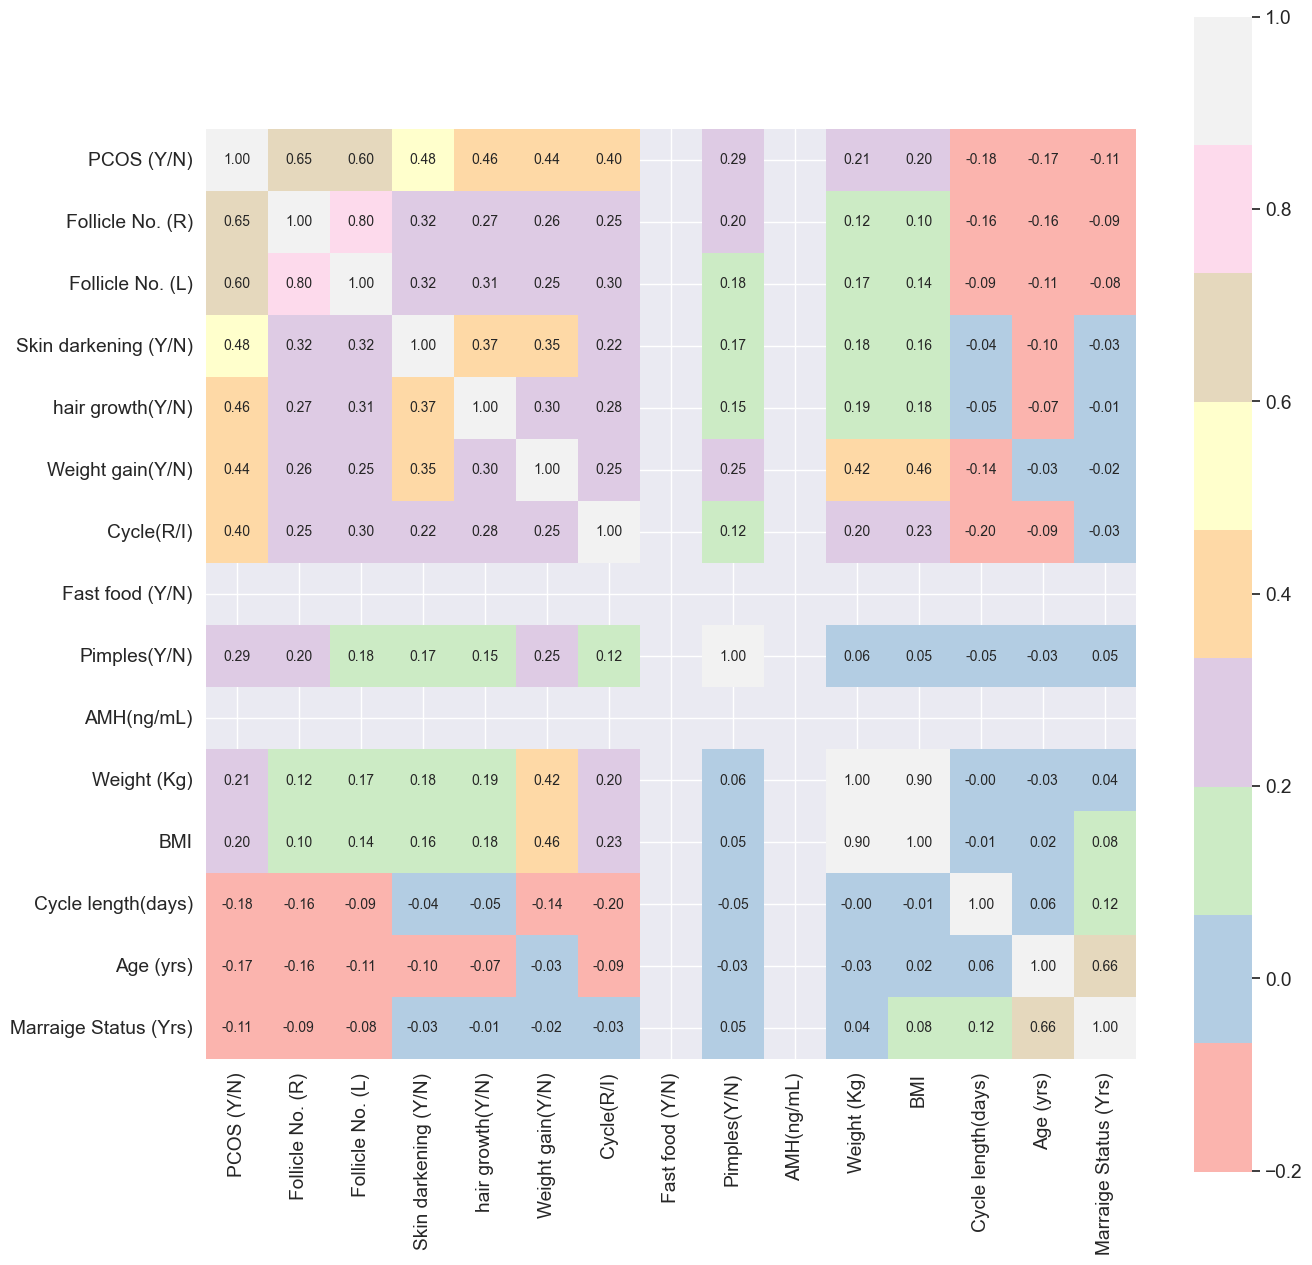

In [23]:
import numpy as np
plt.figure(figsize=(15,15))
k = 12 
l = 3 
cols_p = corrmat.nlargest(k, "PCOS (Y/N)")["PCOS (Y/N)"].index 
cols_n = corrmat.nsmallest(l, "PCOS (Y/N)")["PCOS (Y/N)"].index
cols = cols_p.append(cols_n) 

cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True,cmap="Pastel1", annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

C:\Users\lando\AppData\Local\Temp\ipykernel_12500\241476317.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="PCOS (Y/N)", data=data, palette="Set2")


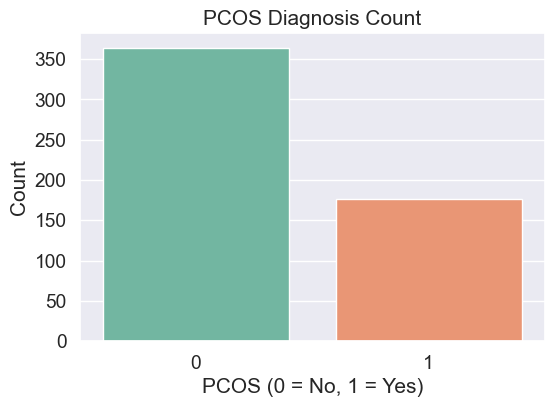

In [24]:
plt.figure(figsize=(6,4))
sns.countplot(x="PCOS (Y/N)", data=data, palette="Set2")
plt.title("PCOS Diagnosis Count")
plt.xlabel("PCOS (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()



In [25]:
data['PCOS (Y/N)'].value_counts()

PCOS (Y/N)
0    364
1    177
Name: count, dtype: int64

In [26]:
data['Blood Group'].unique

<bound method Series.unique of 0      15
1      15
2      11
3      13
4      11
       ..
536    17
537    15
538    13
539    15
540    13
Name: Blood Group, Length: 541, dtype: int64>

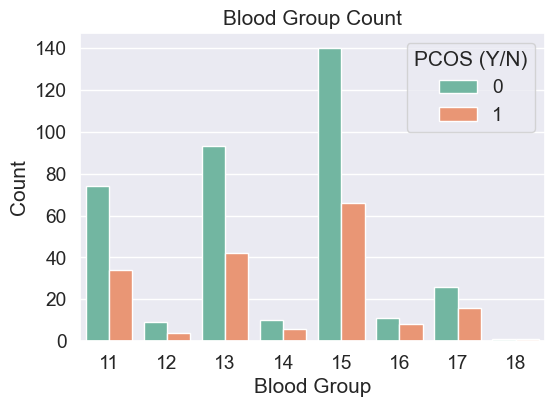

In [27]:
plt.figure(figsize=(6,4))
sns.countplot(x="Blood Group",data=data, hue='PCOS (Y/N)', palette="Set2")
plt.title("Blood Group Count")
plt.xlabel("Blood Group")
plt.ylabel("Count")
plt.show()

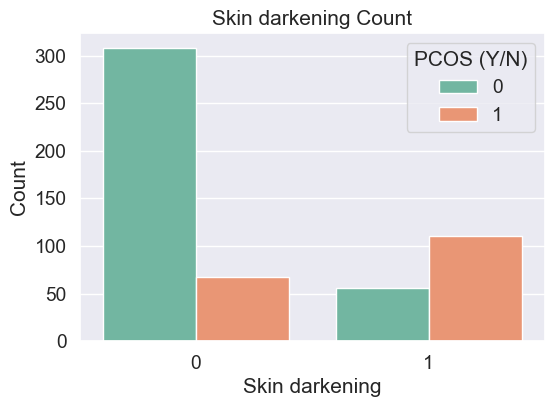

In [28]:
data['Skin darkening (Y/N)'].unique()
plt.figure(figsize=(6,4))
sns.countplot(x="Skin darkening (Y/N)",data=data, hue='PCOS (Y/N)', palette="Set2")
plt.title("Skin darkening Count")
plt.xlabel("Skin darkening")
plt.ylabel("Count")
plt.show()

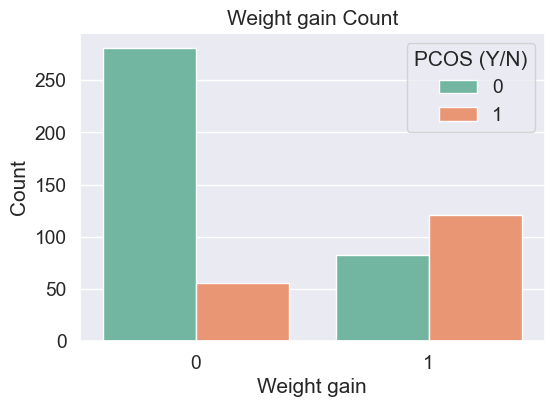

In [29]:
data['Weight gain(Y/N)'].unique()
plt.figure(figsize=(6,4))
sns.countplot(x="Weight gain(Y/N)",data=data, hue='PCOS (Y/N)', palette="Set2")
plt.title("Weight gain Count")
plt.xlabel("Weight gain")
plt.ylabel("Count")
plt.show()

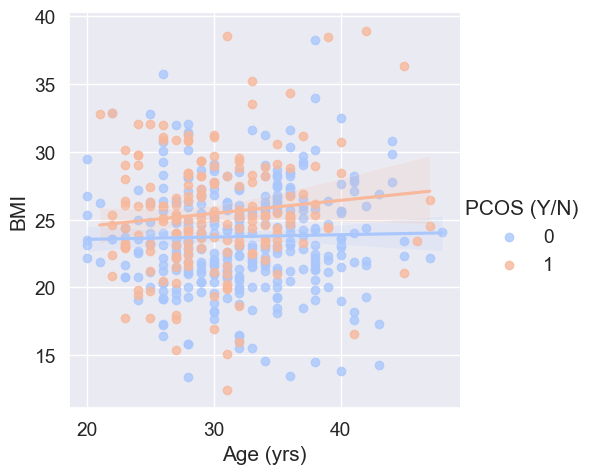

In [30]:
fig= sns.lmplot(data =data,x="Age (yrs)",y="BMI", hue="PCOS (Y/N)", palette= "coolwarm")
plt.show(fig)

#older women with higher BMI are more likely to have PCOS



C:\Users\lando\AppData\Local\Temp\ipykernel_12500\3142199027.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data["PCOS (Y/N)"], y='Follicle No. (L)', data=data, palette="coolwarm")


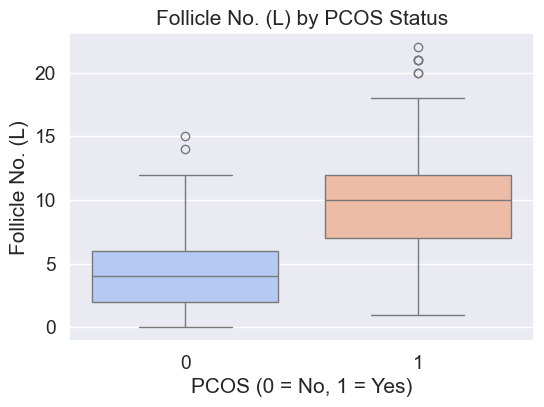

In [31]:
plt.figure(figsize=(6,4))
sns.boxplot(x=data["PCOS (Y/N)"], y='Follicle No. (L)', data=data, palette="coolwarm")
plt.title("Follicle No. (L) by PCOS Status")
plt.xlabel("PCOS (0 = No, 1 = Yes)")
plt.ylabel("Follicle No. (L)")
plt.show()
#PCOS patients have more follicles in the left ovary


C:\Users\lando\AppData\Local\Temp\ipykernel_12500\432280305.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data["PCOS (Y/N)"], y='Follicle No. (R)', data=data, palette="coolwarm")


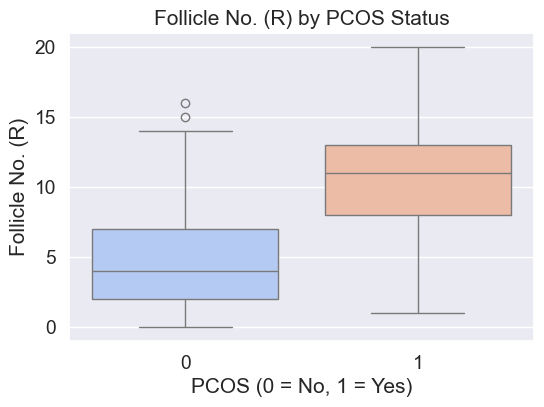

In [32]:
plt.figure(figsize=(6,4))
sns.boxplot(x=data["PCOS (Y/N)"], y='Follicle No. (R)', data=data, palette="coolwarm")
plt.title("Follicle No. (R) by PCOS Status")
plt.xlabel("PCOS (0 = No, 1 = Yes)")
plt.ylabel("Follicle No. (R)")
plt.show()
#PCOS patients have more follicles in the right ovary

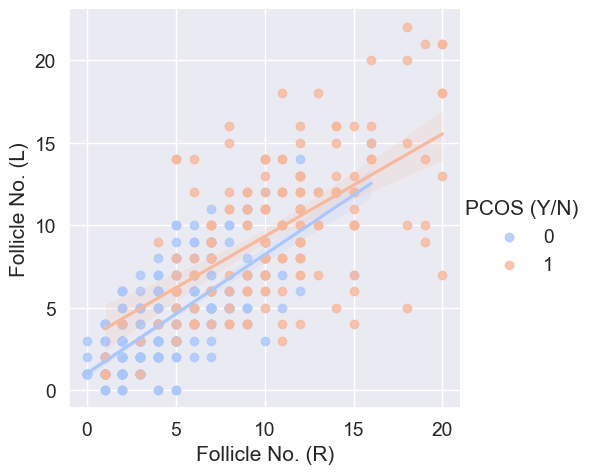

In [33]:
sns.lmplot(data =data,x='Follicle No. (R)',y='Follicle No. (L)', hue="PCOS (Y/N)",palette="coolwarm")
plt.show()
#PCOS patients have more follicles in both ovaries


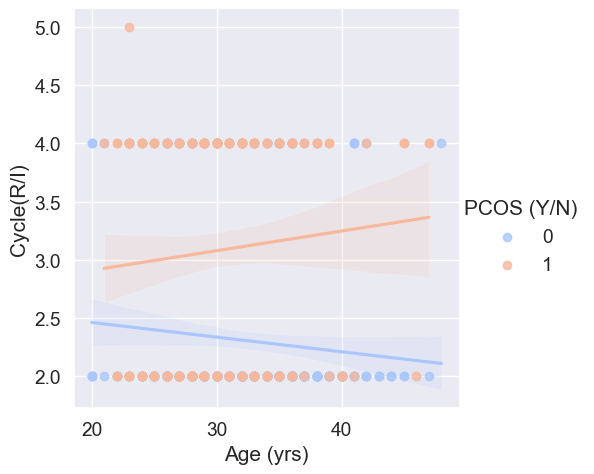

In [36]:
sns.lmplot(data =data,x="Age (yrs)",y="Cycle(R/I)", hue="PCOS (Y/N)",palette="coolwarm")
plt.show()
#PCOS patients have irregular cycles



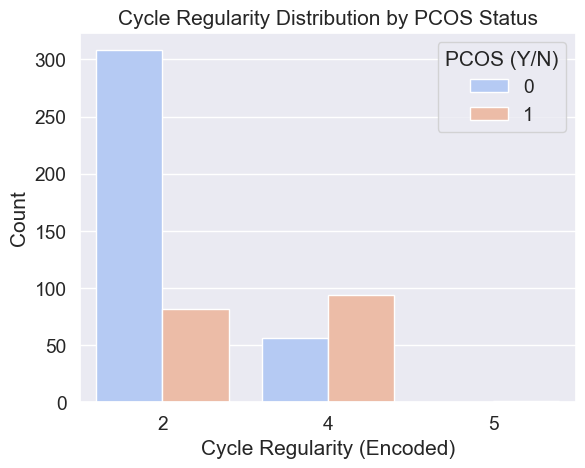

In [37]:
sns.countplot(data=data, x="Cycle(R/I)", hue="PCOS (Y/N)", palette="coolwarm")
plt.title("Cycle Regularity Distribution by PCOS Status")
plt.xlabel("Cycle Regularity (Encoded)")
plt.ylabel("Count")
plt.show()


In [38]:
data['Skin darkening (Y/N)'].unique()
data['Weight gain(Y/N)'].unique()
data['hair growth(Y/N)'].unique()


array([0, 1])

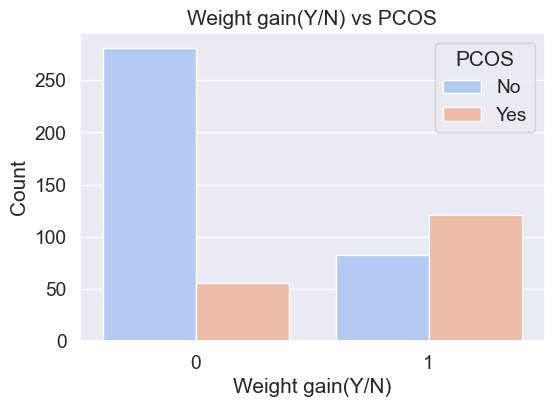

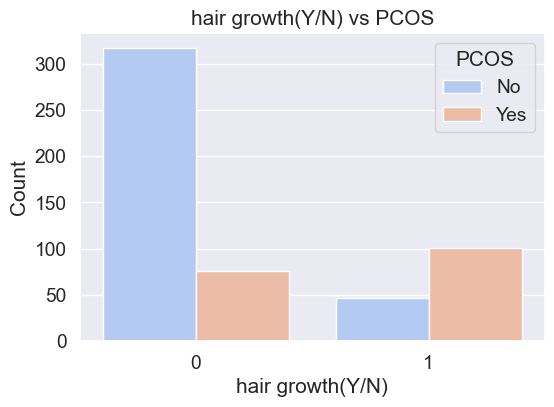

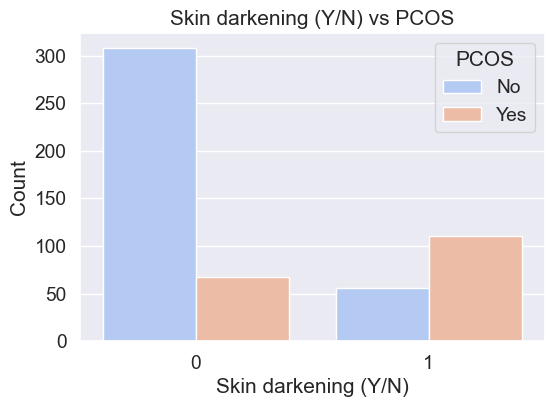

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)']

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data, x=feature, hue="PCOS (Y/N)", palette="coolwarm")
    plt.title(f"{feature} vs PCOS")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.legend(title="PCOS", labels=["No", "Yes"])
    plt.show()
#PCOS patients are more likely to have weight gain, hair growth and skin darkening

In [40]:
x=data.drop(['PCOS (Y/N)'],axis=1)
y=data['PCOS (Y/N)']
x=np.nan_to_num(x)

### handling unbalanced data
#### oversampling

In [41]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

In [57]:
y_resampled.shape

(728,)

In [59]:
x_resampled.shape

(728, 41)

#### scaling

In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)



In [45]:
#normalize the oversampled data
x_res_scaled = scaler.fit_transform(x_resampled)


In [46]:
print("Scaled features (x):", x_scaled)


Scaled features (x): [[0.28571429 0.17662338 0.34883721 ... 0.75       0.75       0.47222222]
 [0.57142857 0.44155844 0.56976744 ... 0.625      0.58333333 0.20555556]
 [0.46428571 0.49090909 0.65116279 ... 0.75       0.83333333 0.55555556]
 ...
 [0.57142857 0.2987013  0.34883721 ... 0.75       0.375      0.40555556]
 [0.25       0.24675325 0.30232558 ... 0.75       0.66666667 0.63888889]
 [0.10714286 0.66233766 0.65116279 ... 0.79166667 0.75       0.38333333]]


### PCA : principal components analysis

In [62]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
x_pca = pca.fit_transform(x_res_scaled)
print("before PCA features shape:", x_res_scaled.shape)
print("PCA transformed features shape:", x_pca.shape)
print("Explained variance ratio:", pca.explained_variance_ratio_)

before PCA features shape: (728, 41)
PCA transformed features shape: (728, 19)
Explained variance ratio: [0.25847695 0.1044792  0.0886834  0.08000452 0.06980546 0.06137007
 0.05434101 0.04815043 0.03559464 0.02752689 0.02421433 0.022243
 0.02012651 0.01817874 0.00894273 0.00814448 0.00709787 0.00684239
 0.00641463]


In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=10)

In [63]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_pca, y_resampled, test_size=0.2, random_state=10)

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score, mean_absolute_error, f1_score
from sklearn.model_selection import cross_val_score

### KNN

In [ ]:
#train the model on PCA transformed data
knn2 = KNeighborsClassifier(n_neighbors=20)
# Train the model
knn2.fit(x_train2, y_train2.ravel())  # Use .ravel() to flatten y_train if it's a 2D array
print(f'cross validation score :{cross_val_score(knn2,x_train2,y_train2.ravel(),cv=5).mean()}')
# Make predictions on the test set
y_pred2 = knn2.predict(x_test2)
# Evaluate the model
accuracy2 = accuracy_score(y_test2, y_pred2)
print("Accuracy on PCA data:", accuracy2)
mse2, r2_2, mae2, f1score2 = mean_squared_error(y_pred2, y_test2), r2_score( y_pred2,y_test2), mean_absolute_error( y_pred2,y_test2),f1_score(y_pred2, y_test2)
print(f'MSE: {mse2}\nR2: {r2_2}\nMAE: {mae2}\nF1_score: {f1score2}')


cross validation score :0.8541261420571764
Accuracy on PCA data: 0.821917808219178
MSE: 0.1780821917808219
R2: 0.27901234567901234
MAE: 0.1780821917808219
F1_score: 0.8395061728395061


C:\Users\lando\AppData\Local\Temp\ipykernel_12500\3924706419.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  knn2.fit(x_train2, y_train2.ravel())  # Use .ravel() to flatten y_train if it's a 2D array
C:\Users\lando\AppData\Local\Temp\ipykernel_12500\3924706419.py:5: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  print(f'cross validation score :{cross_val_score(knn2,x_train2,y_train2.ravel(),cv=5).mean()}')


trying with oversampled data

## SVM

In [68]:
# training with the pca transformed data
from sklearn.svm import SVC
svm2 = SVC(kernel='linear', gamma=1,C=1)
svm2.fit(x_train2, y_train2.ravel())
print(f'cross validation score :{cross_val_score(svm2,x_train2,y_train2.ravel(),cv=5).mean()}')
y_pred2 = svm2.predict(x_test2)
accuracy2 = accuracy_score(y_test2, y_pred2)
print("Accuracy on PCA data:", accuracy2)
mse2, r2_2, mae2, f1score2 = mean_squared_error(y_pred2, y_test2), r2_score( y_pred2,y_test2), mean_absolute_error( y_pred2,y_test2), f1_score(y_pred2, y_test2)
print(f'MSE: {mse2}\nR2: {r2_2}\nMAE: {mae2}\nF1_score: {f1score2}')



cross validation score :0.9055702917771882
Accuracy on PCA data: 0.9178082191780822
MSE: 0.0821917808219178
R2: 0.6689967882108445
MAE: 0.0821917808219178
F1_score: 0.925


C:\Users\lando\AppData\Local\Temp\ipykernel_12500\1398568362.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  svm2.fit(x_train2, y_train2.ravel())
C:\Users\lando\AppData\Local\Temp\ipykernel_12500\1398568362.py:5: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  print(f'cross validation score :{cross_val_score(svm2,x_train2,y_train2.ravel(),cv=5).mean()}')


## logistic regression

In [70]:
#training with the pca transformed data
from sklearn.linear_model import LogisticRegression
lg2 = LogisticRegression(max_iter=1000, random_state=0)
print(f'cross validation score :{cross_val_score(lg2,x_train2,y_train2.ravel(),cv=5).mean()}')
lg2.fit(x_train2, y_train2.ravel())
y_pred2 = lg2.predict(x_test2)
accuracy2 = accuracy_score(y_test2, y_pred2)
print("Accuracy on PCA data:", accuracy2)
mse2, r2_2, mae2, f1score2 = mean_squared_error(y_pred2, y_test2), r2_score( y_pred2,y_test2), mean_absolute_error( y_pred2,y_test2), f1_score(y_pred2, y_test2)
print(f'MSE: {mse2}\nR2: {r2_2}\nMAE: {mae2}\nF1_score: {f1score2}')


cross validation score :0.9072944297082227
Accuracy on PCA data: 0.9246575342465754
MSE: 0.07534246575342465
R2: 0.6981203007518797
MAE: 0.07534246575342465
F1_score: 0.9299363057324841


C:\Users\lando\AppData\Local\Temp\ipykernel_12500\4156195226.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  print(f'cross validation score :{cross_val_score(lg2,x_train2,y_train2.ravel(),cv=5).mean()}')
C:\Users\lando\AppData\Local\Temp\ipykernel_12500\4156195226.py:5: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  lg2.fit(x_train2, y_train2.ravel())


#### Random forest

In [71]:
from sklearn.ensemble import RandomForestClassifier
rf2 = RandomForestClassifier(n_estimators=100, random_state=42)
print(f'cross validation score :{cross_val_score(rf2,x_train2,y_train2.ravel(),cv=5).mean()}')
rf2.fit(x_train2, y_train2.ravel())
y_pred2 = rf2.predict(x_test2)
accuracy2 = accuracy_score(y_test2, y_pred2)
print("Accuracy on PCA data:", accuracy2)
mse2, r2_2, mae2, f1score2 = mean_squared_error(y_pred2, y_test2), r2_score( y_pred2,y_test2), mean_absolute_error( y_pred2,y_test2), f1_score(y_pred2, y_test2)
print(f'MSE: {mse2}\nR2: {r2_2}\nMAE: {mae2}\nF1_score: {f1score2}')


C:\Users\lando\AppData\Local\Temp\ipykernel_12500\2058865183.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  print(f'cross validation score :{cross_val_score(rf2,x_train2,y_train2.ravel(),cv=5).mean()}')


cross validation score :0.9056292366637194
Accuracy on PCA data: 0.8904109589041096
MSE: 0.1095890410958904
R2: 0.558662384281126
MAE: 0.1095890410958904
F1_score: 0.9


C:\Users\lando\AppData\Local\Temp\ipykernel_12500\2058865183.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  rf2.fit(x_train2, y_train2.ravel())


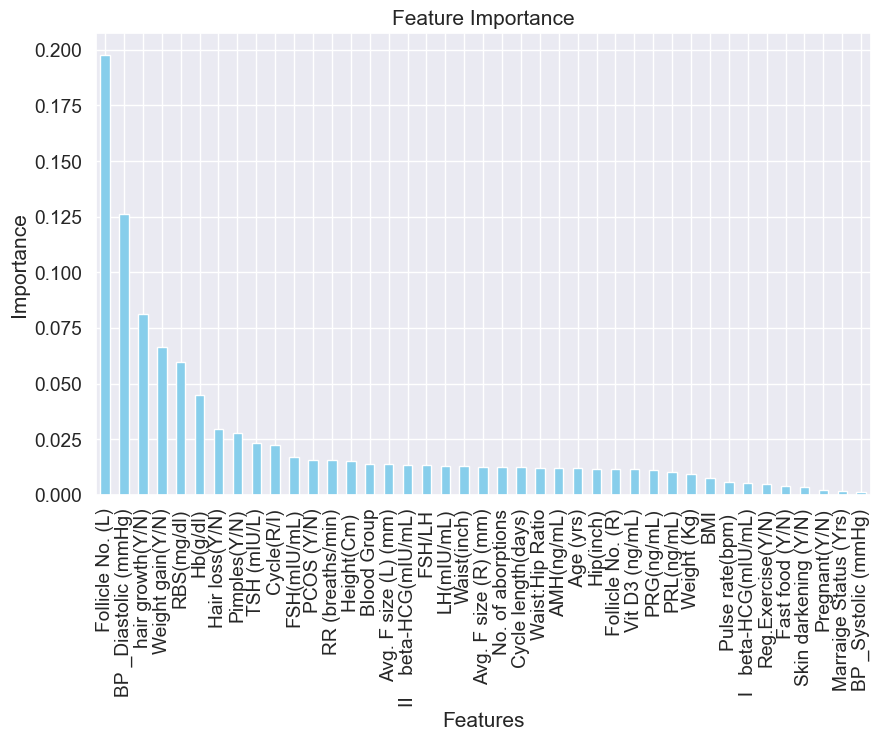

In [ ]:
feature_importances = pd.Series(rf2.feature_importances_, index=data.columns[:-1]) 
feature_importances = feature_importances.sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar', color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

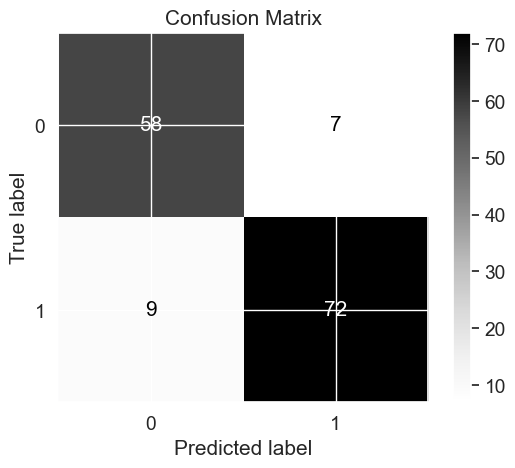

In [72]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_test2, y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf2.classes_)
disp.plot(cmap='Greys')
plt.title('Confusion Matrix')
plt.show()

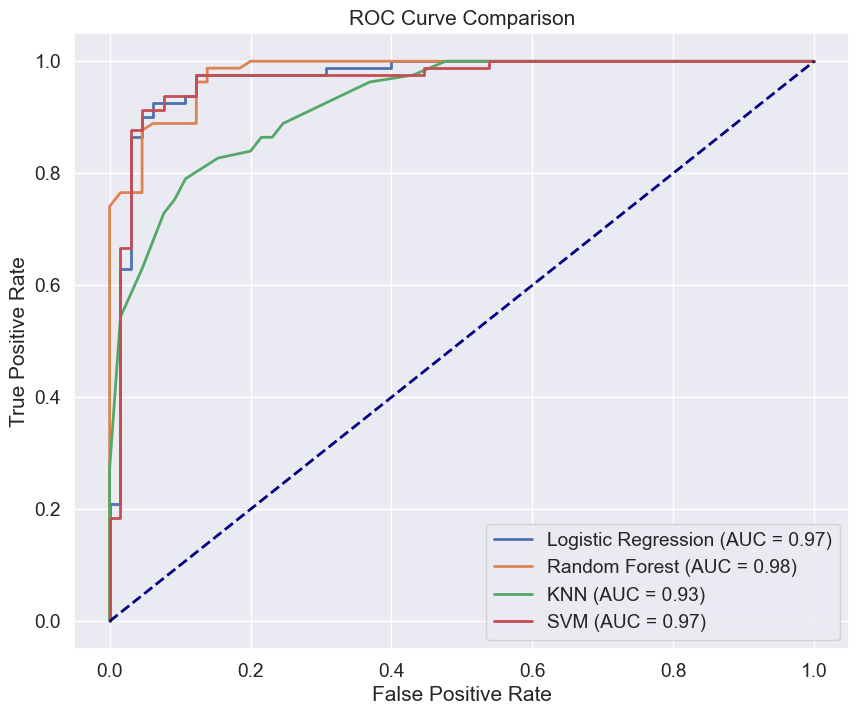

In [73]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Initialize a dictionary to store ROC data for each model
roc_data = {}

# Logistic Regression
y_prob_lg = lg2.predict_proba(x_test2)[:, 1]  
fpr_lg, tpr_lg, _ = roc_curve(y_test2, y_prob_lg)
roc_auc_lg = auc(fpr_lg, tpr_lg)
roc_data['Logistic Regression'] = (fpr_lg, tpr_lg, roc_auc_lg)

# Random Forest
y_prob_rf = rf2.predict_proba(x_test2)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test2, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_data['Random Forest'] = (fpr_rf, tpr_rf, roc_auc_rf)

# KNN
y_prob_knn = knn2.predict_proba(x_test2)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test2, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
roc_data['KNN'] = (fpr_knn, tpr_knn, roc_auc_knn)

# SVM (use decision_function instead of predict_proba)
y_score_svm = svm2.decision_function(x_test2)
fpr_svm, tpr_svm, _ = roc_curve(y_test2, y_score_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)
roc_data['SVM'] = (fpr_svm, tpr_svm, roc_auc_svm)

# Plot all ROC curves
plt.figure(figsize=(10, 8))
for model, (fpr, tpr, roc_auc) in roc_data.items():
    plt.plot(fpr, tpr, lw=2, label=f'{model} (AUC = {roc_auc:.2f})')

# Plot the diagonal line (random guessing)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Add labels, title, and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()